In [48]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
!wget https://lazyprogrammer.me/course_files/exercises/boston.txt

--2025-05-21 14:01:22--  https://lazyprogrammer.me/course_files/exercises/boston.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘boston.txt’

boston.txt              [  <=>               ]  50.05K   227KB/s    in 0.2s    

2025-05-21 14:01:24 (227 KB/s) - ‘boston.txt’ saved [51256]



In [4]:
!ls

boston.txt  sample_data


In [47]:
col_names = pd.read_fwf('boston.txt', usecols=[0], header=None, skiprows=7, nrows=14)
cnames = col_names[0].to_list()
print(cnames)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [76]:
merged_lines = []

# Step 1: Read the file and merge every two lines
with open("boston.txt", "r") as f:
    lines = [line.strip() for line in f if line.strip()]
    for i in range(0, len(lines), 2):
        merged_line = lines[i] + " " + lines[i + 1]
        merged_lines.append(merged_line)

# Step 2: Convert to DataFrame
data_str = "\n".join(merged_lines)
df = pd.read_csv(StringIO(data_str), skiprows=10, sep='\s+', header=None, names=cnames)

print(df);

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [81]:
data = df.to_numpy()
X = data[:, :-1]
Y = data[:, -1].reshape(-1, 1)
print(X.shape, Y.shape)


(506, 13) (506, 1)


In [89]:
# Scale and center both the X and Y axes
mx = np.mean(X, axis=0)
sx = np.std(X, axis=0)
my = np.mean(Y, axis=0)
sy = np.std(Y, axis=0)

Xn = (X - mx) / sx
Yn = (Y - my) / sy

In [92]:
# convert the standardized data into torch tensors
inputs = torch.from_numpy(Xn.astype(np.float32))
targets = torch.from_numpy(Yn.astype(np.float32))

epoch 1/100	loss: 0.9968
epoch 2/100	loss: 0.6185
epoch 3/100	loss: 0.4900
epoch 4/100	loss: 0.4088
epoch 5/100	loss: 0.3669
epoch 6/100	loss: 0.3416
epoch 7/100	loss: 0.3254
epoch 8/100	loss: 0.3140
epoch 9/100	loss: 0.3056
epoch 10/100	loss: 0.2990
epoch 11/100	loss: 0.2937
epoch 12/100	loss: 0.2893
epoch 13/100	loss: 0.2857
epoch 14/100	loss: 0.2826
epoch 15/100	loss: 0.2800
epoch 16/100	loss: 0.2778
epoch 17/100	loss: 0.2759
epoch 18/100	loss: 0.2742
epoch 19/100	loss: 0.2727
epoch 20/100	loss: 0.2715
epoch 21/100	loss: 0.2703
epoch 22/100	loss: 0.2693
epoch 23/100	loss: 0.2685
epoch 24/100	loss: 0.2677
epoch 25/100	loss: 0.2670
epoch 26/100	loss: 0.2664
epoch 27/100	loss: 0.2658
epoch 28/100	loss: 0.2653
epoch 29/100	loss: 0.2649
epoch 30/100	loss: 0.2644
epoch 31/100	loss: 0.2641
epoch 32/100	loss: 0.2637
epoch 33/100	loss: 0.2634
epoch 34/100	loss: 0.2632
epoch 35/100	loss: 0.2629
epoch 36/100	loss: 0.2627
epoch 37/100	loss: 0.2625
epoch 38/100	loss: 0.2623
epoch 39/100	loss: 0.

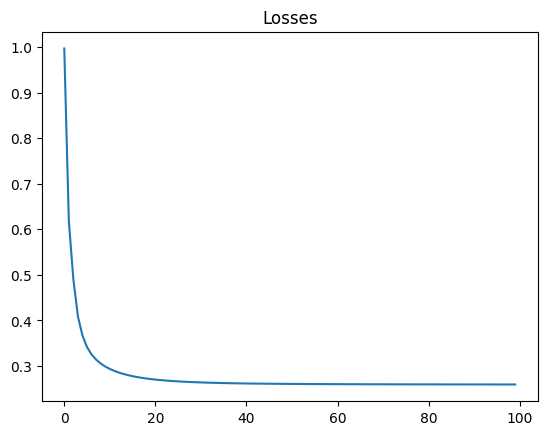

In [93]:
# define the model
model = nn.Linear(13, 1)

# loss and optimization
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.2)

# train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
    # initialize gradient params to zero
    optimizer.zero_grad()
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # save loss for plot
    losses.append(loss.item())
    # backpropagation and optimization
    loss.backward()
    optimizer.step()
    # print result
    print(f'epoch {it+1}/{n_epochs}\tloss: {loss.item():.4f}')

plt.plot(losses)
plt.title('Losses');

In [96]:
# recover the output in numpy array format
predictions = model(inputs).detach().numpy()


(506, 1)


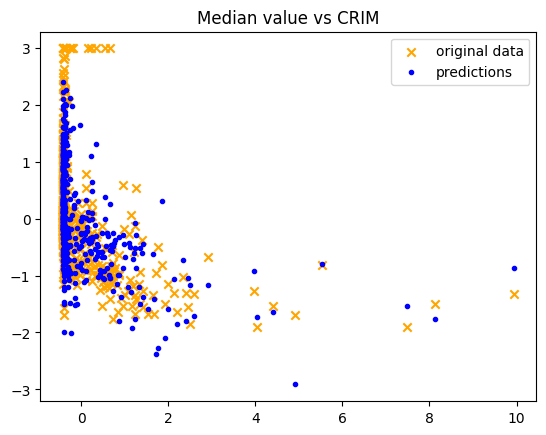

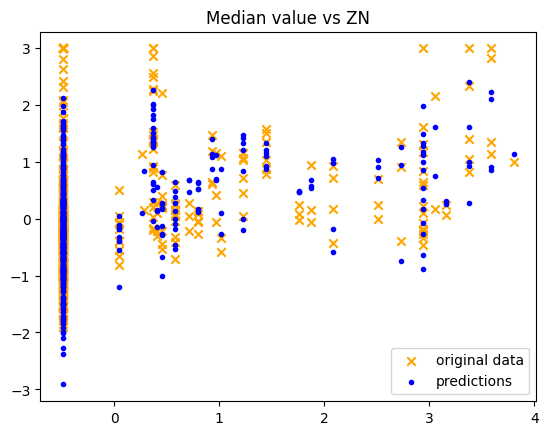

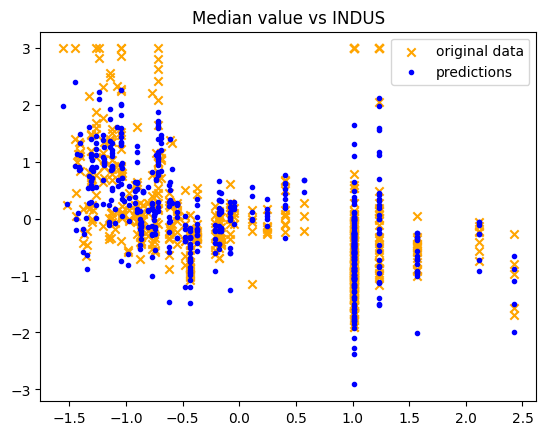

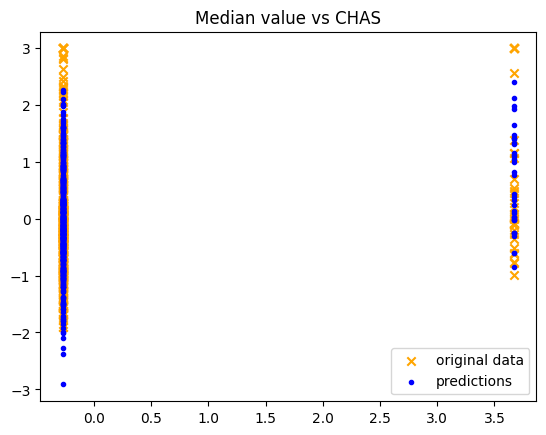

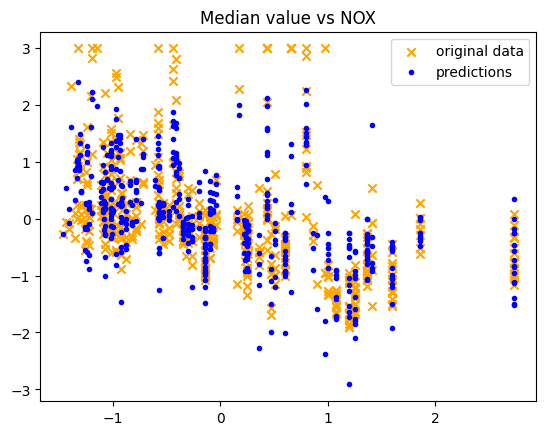

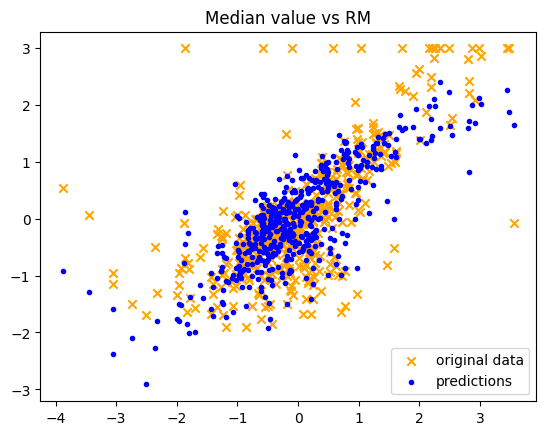

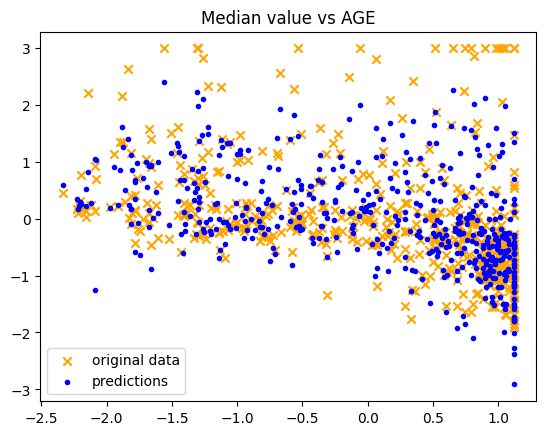

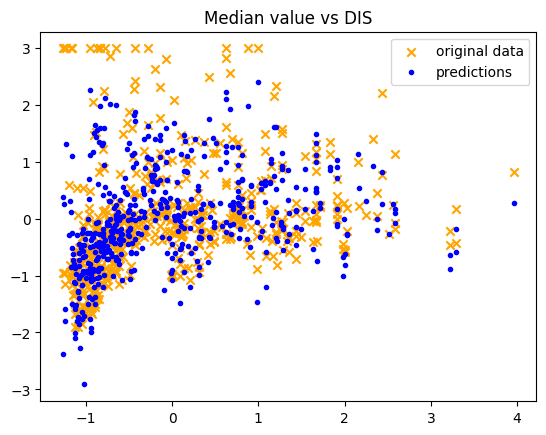

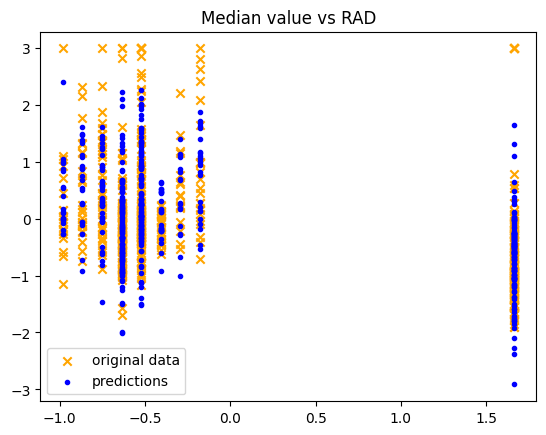

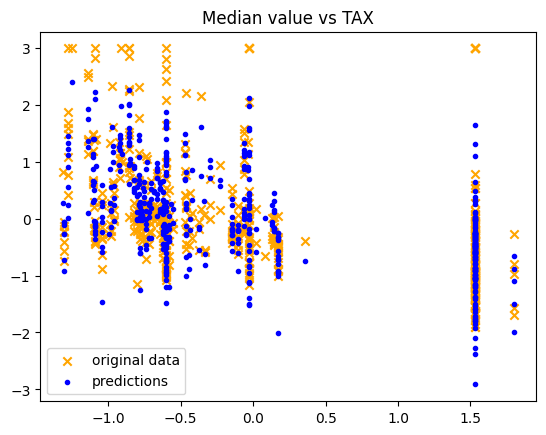

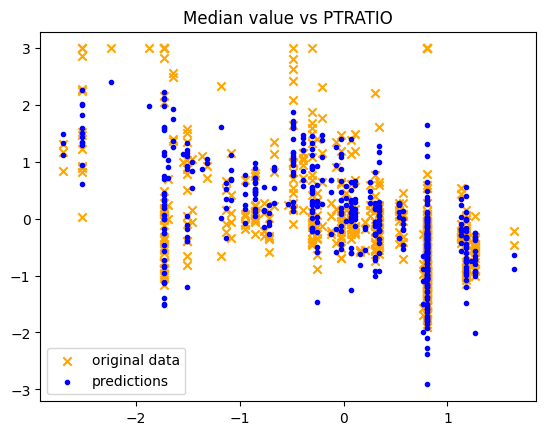

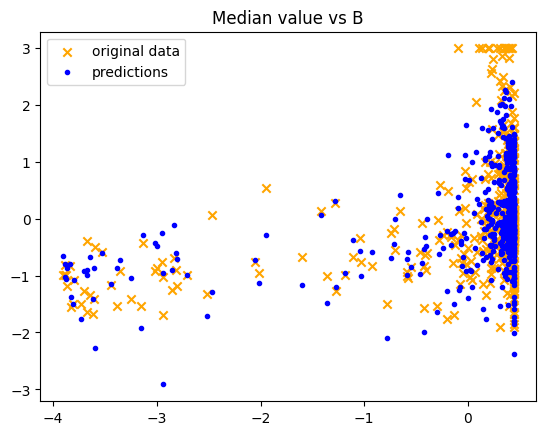

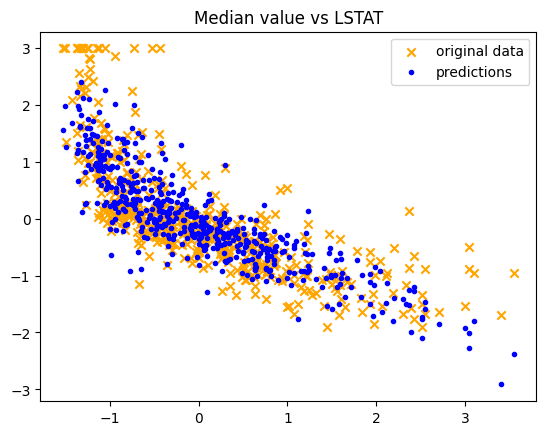

In [117]:
for i in range(len(cnames)-1):
    plt.scatter(Xn[:, i], Yn, c='orange', marker='x', label='original data')
    plt.scatter(Xn[:, i], predictions, c='b', marker='.', label='predictions')
    plt.title(f'Median value vs {cnames[i]}')
    plt.legend()
    plt.show()